# CHARGEMENT DES BIBLIOTHEQUES

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Chargement du jeu de données "LIGNES_TICKET_V4"

In [69]:
data3 = pd.read_csv("LIGNES_TICKET_V4.csv", sep='|', low_memory=False)
print(data3.shape)
print(list(data3.columns))

(34105705, 7)
['IDTICKET', 'NUMLIGNETICKET', 'IDARTICLE', 'QUANTITE', 'MONTANTREMISE', 'TOTAL', 'MARGESORTIE']


La ligne de code ci-dessous nous permet de voir le détail des colonnes de notre jeu de données ainsi que le type de données (chaîne de caractères, numérique)

In [70]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105705 entries, 0 to 34105704
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   IDTICKET        int64 
 1   NUMLIGNETICKET  int64 
 2   IDARTICLE       object
 3   QUANTITE        object
 4   MONTANTREMISE   object
 5   TOTAL           object
 6   MARGESORTIE     object
dtypes: int64(2), object(5)
memory usage: 1.8+ GB


Aperçu du jeu de données.

In [71]:
data3

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
0,190400316260,2,246208,"1,000",",000","4,96","2,37"
1,190400316262,2,33725,"1,000",",000","8,25","3,63"
2,190400316262,3,634497,"1,000",",000","5,79","3,63"
3,190400316262,1,257613,"1,000",",000","18,29","6,21"
4,190400316263,1,257627,"1,000",",000","49,92","10,42"
...,...,...,...,...,...,...,...
34105700,340200383203,2,257643,1,0,"4,69","1,83"
34105701,340200383203,3,50170,1,0,"3,18",1
34105702,340200383203,4,349345,1,0,"3,46","1,13"
34105703,340200383203,5,250580,2,0,"6,8","2,18"


Afin d'exploiter de façon optimale les informations, nous allons convetir les l'ID TICKET et le NUM LIGNE TICKET en caractère. A l'inverse, nous devons convertir les quantités, les montants, les totaux et les marges en valeur numérique.

In [72]:
data3['IDTICKET'] = data3['IDTICKET'].astype(str)
data3['NUMLIGNETICKET'] = data3['NUMLIGNETICKET'].astype(str)

In [73]:
data3["QUANTITE"]=data3['QUANTITE'].str.replace(',', '.').astype(float)

In [74]:
data3["TOTAL"]=data3['TOTAL'].str.replace(',', '.').astype(float)

In [75]:
data3["MONTANTREMISE"]=data3['MONTANTREMISE'].str.replace(',', '.').astype(float)

In [76]:
data3["MARGESORTIE"]=data3['MARGESORTIE'].str.replace(',', '.').astype(float)

Vérification du traitement.

In [77]:
data3

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
0,190400316260,2,246208,1.0,0.000,4.96,2.37
1,190400316262,2,33725,1.0,0.000,8.25,3.63
2,190400316262,3,634497,1.0,0.000,5.79,3.63
3,190400316262,1,257613,1.0,0.000,18.29,6.21
4,190400316263,1,257627,1.0,0.000,49.92,10.42
...,...,...,...,...,...,...,...
34105700,340200383203,2,257643,1.0,0.000,4.69,1.83
34105701,340200383203,3,50170,1.0,0.000,3.18,1.00
34105702,340200383203,4,349345,1.0,0.000,3.46,1.13
34105703,340200383203,5,250580,2.0,0.000,6.80,2.18


#data3['TOTAL'].replace({'': '0.0'}, inplace=True)

Vérification du traitement.

In [78]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105705 entries, 0 to 34105704
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   IDTICKET        object 
 1   NUMLIGNETICKET  object 
 2   IDARTICLE       object 
 3   QUANTITE        float64
 4   MONTANTREMISE   float64
 5   TOTAL           float64
 6   MARGESORTIE     float64
dtypes: float64(4), object(3)
memory usage: 1.8+ GB


La ligne de code ci-dessous nous permet d'identifier les valeurs en doublons qui conviendra de traiter.

In [13]:
print(data3.duplicated().sum())
data = data3.drop_duplicates()

130


Nous allons désormais procéder au traitement de ces doublons.

In [14]:
data3.drop_duplicates(keep='first', inplace=True)

Code de vérification.

In [15]:
print(data3.duplicated().sum())

0


Nous procédons également à la vérification de présence ou non de valeurs manquantes (aucune valeur détectée).

In [16]:
pd.DataFrame(index=data.columns, columns=['%_missing_values'], data= (data.isna().sum().values / len(data)*100))

,%_missing_values
IDTICKET,0.0
NUMLIGNETICKET,0.0
IDARTICLE,0.0
QUANTITE,0.0
MONTANTREMISE,0.0
TOTAL,0.0
MARGESORTIE,0.0


Il convient à présent de vérifier la présence de valeur aberrantes.

<Axes: >

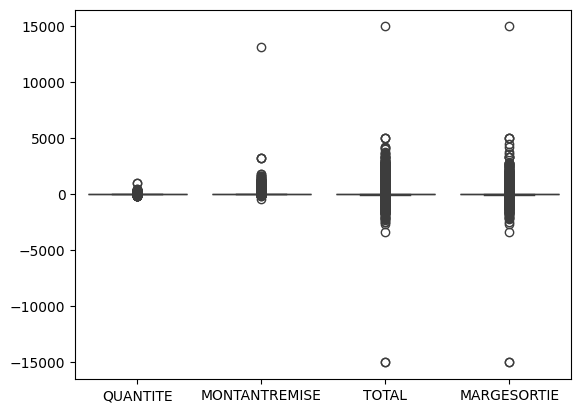

In [17]:
# Visualisation des boxplots des variables numériques
sns.boxplot(data3)

La série de code ci-dessous permet de traiter les valeurs aberrantes en présence, sur chacune des catégories concernées.

In [18]:
''' Detection '''
# IQR
Q1 = np.percentile(data3['QUANTITE'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data3['QUANTITE'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data3.shape)

Old Shape:  (34105575, 7)


In [19]:
# Upper bound
upper = np.where(data3['QUANTITE'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data3['QUANTITE'] <= (Q1-1.5*IQR))

In [20]:
# IQR
Q1 = np.percentile(data3['TOTAL'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data3['TOTAL'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data3.shape)

Old Shape:  (34105575, 7)


In [21]:
# Upper bound
upper = np.where(data3['TOTAL'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data3['TOTAL'] <= (Q1-1.5*IQR))

In [22]:
# IQR
Q1 = np.percentile(data3['MONTANTREMISE'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data3['MONTANTREMISE'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data3.shape)

Old Shape:  (34105575, 7)


In [23]:
# Upper bound
upper = np.where(data3['MONTANTREMISE'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data3['MONTANTREMISE'] <= (Q1-1.5*IQR))

In [24]:
# IQR
Q1 = np.percentile(data3['MARGESORTIE'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data3['MARGESORTIE'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data3.shape)

Old Shape:  (34105575, 7)


In [25]:
# Upper bound
upper = np.where(data3['MARGESORTIE'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data3['MARGESORTIE'] <= (Q1-1.5*IQR))

In [26]:
print("New Shape: ", data3.shape)

New Shape:  (34105575, 7)


# CHARGEMENT DES BIBLIOTHEQUES

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Chargement du jeu de données REF_ARTICLE.

In [28]:
import pandas as pd

data4 = pd.read_csv('REF_ARTICLE.CSV', sep='|',low_memory=False)
print(data4.shape)
print(list(data4.columns))


(665946, 4)
['CODEARTICLE', 'CODEUNIVERS', 'CODEFAMILLE', 'CODESOUSFAMILLE']


La ligne de code ci-dessous nous permet de connaître le détail des colonnes ainsi que le type de données constituant notre base (numérique ou caractères).

In [29]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665946 entries, 0 to 665945
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   CODEARTICLE      665946 non-null  object
 1   CODEUNIVERS      665946 non-null  object
 2   CODEFAMILLE      665946 non-null  object
 3   CODESOUSFAMILLE  665946 non-null  object
dtypes: object(4)
memory usage: 20.3+ MB


Aperçu de notre jeu de données. 

In [30]:
data4

,CODEARTICLE,CODEUNIVERS,CODEFAMILLE,CODESOUSFAMILLE
0,COUPON,COUPON,COUPON,COUPON
1,1001,U2,130,130040
2,100125,U1,010,010020
3,100150,U1,010,010020
4,10018,U1,100,100900
...,...,...,...,...
665941,407717,U3,120,120070
665942,407719,U3,120,120070
665943,407720,U3,120,120070
665944,407721,U3,120,120070


In [31]:
data4.drop(0, inplace=True)

In [32]:
data4

,CODEARTICLE,CODEUNIVERS,CODEFAMILLE,CODESOUSFAMILLE
1,1001,U2,130,130040
2,100125,U1,010,010020
3,100150,U1,010,010020
4,10018,U1,100,100900
5,10019,U1,100,100900
...,...,...,...,...
665941,407717,U3,120,120070
665942,407719,U3,120,120070
665943,407720,U3,120,120070
665944,407721,U3,120,120070


In [33]:
#modalités variables:
data4['CODEARTICLE'].value_counts(dropna = False)

CODEARTICLE
1001      1
278616    1
277497    1
277502    1
299706    1
         ..
145641    1
145642    1
145643    1
145644    1
407723    1
Name: count, Length: 665945, dtype: int64

In [34]:
data4['CODEUNIVERS'].value_counts(dropna = False)

CODEUNIVERS
U1    274652
U2    236139
U3     72725
U4     66413
U0     16016
Name: count, dtype: int64

In [35]:
data4['CODEFAMILLE'].value_counts(dropna = False)

CODEFAMILLE
090    157747
010     65324
130     63055
120     60886
180     46685
080     36253
100     33971
140     33907
020     31685
220     30893
050     22395
030     22165
070     14484
110     11839
160      8561
190      6449
040      5176
400      3884
170      3570
900      2196
200      1613
230      1092
060       979
210       853
990       283
Name: count, dtype: int64

In [36]:
data4['CODESOUSFAMILLE'].value_counts(dropna = False)

CODESOUSFAMILLE
180090    44779
140010    23698
120060    23371
090800    23326
090070    21254
          ...  
100110        1
110110        1
900990        1
200060        1
180999        1
Name: count, Length: 343, dtype: int64

La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) en doublons.

In [37]:
print(data4.duplicated().sum())
data4 = data4.drop_duplicates()

0


La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) manquante(s)

In [38]:
pd.DataFrame(index=data4.columns, columns=['%_missing_values'], data= (data4.isna().sum().values / len(data4)*100))

,%_missing_values
CODEARTICLE,0.0
CODEUNIVERS,0.0
CODEFAMILLE,0.0
CODESOUSFAMILLE,0.0


In [39]:
data4.drop(columns=['CODESOUSFAMILLE'], inplace=True)

Vérification du traitement

In [40]:
data4

,CODEARTICLE,CODEUNIVERS,CODEFAMILLE
1,1001,U2,130
2,100125,U1,010
3,100150,U1,010
4,10018,U1,100
5,10019,U1,100
...,...,...,...
665941,407717,U3,120
665942,407719,U3,120
665943,407720,U3,120
665944,407721,U3,120


In [41]:
data4.rename(columns={'CODEARTICLE': 'IDARTICLE'}, inplace=True)

In [42]:
data4

,IDARTICLE,CODEUNIVERS,CODEFAMILLE
1,1001,U2,130
2,100125,U1,010
3,100150,U1,010
4,10018,U1,100
5,10019,U1,100
...,...,...,...
665941,407717,U3,120
665942,407719,U3,120
665943,407720,U3,120
665944,407721,U3,120


In [110]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665945 entries, 1 to 665945
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   IDARTICLE    665945 non-null  object
 1   CODEUNIVERS  665945 non-null  object
 2   CODEFAMILLE  665945 non-null  object
dtypes: object(3)
memory usage: 15.2+ MB


In [80]:
data_merge = data3.merge(data4, how='left', left_on='IDARTICLE', right_on='IDARTICLE')


In [81]:
data_merge

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE,CODEUNIVERS,CODEFAMILLE
0,190400316260,2,246208,1.0,0.000,4.96,2.37,U3,120
1,190400316262,2,33725,1.0,0.000,8.25,3.63,U3,120
2,190400316262,3,634497,1.0,0.000,5.79,3.63,U3,120
3,190400316262,1,257613,1.0,0.000,18.29,6.21,U3,120
4,190400316263,1,257627,1.0,0.000,49.92,10.42,U3,120
...,...,...,...,...,...,...,...,...,...
34105700,340200383203,2,257643,1.0,0.000,4.69,1.83,U4,220
34105701,340200383203,3,50170,1.0,0.000,3.18,1.00,U4,220
34105702,340200383203,4,349345,1.0,0.000,3.46,1.13,U4,220
34105703,340200383203,5,250580,2.0,0.000,6.80,2.18,U4,220


In [82]:
top_univers_cde = data_merge.groupby('CODEUNIVERS')['QUANTITE'].sum().reset_index()
top_univers_cde = top_univers_cde.sort_values(by='QUANTITE', ascending=False).head(1)